Analysing emotions using **VREED** dataset and **Pycaret**. VREED is a publicly available dataset on Kaggle. Download the dataset using this link - https://www.kaggle.com/datasets/lumaatabbaa/vr-eyes-emotions-dataset-vreed .
Install Pycaret using !pip install pycaret .
Check out https://pycaret.readthedocs.io/en/latest/installation.html for more details.

In [1]:
#import necessary libraries
import pandas as pd
from pycaret.classification import *
from sklearn import preprocessing

In [2]:
#read csv file
df_eye_all = pd.read_csv("VREED_Dataset/04 Eye Tracking Data/02 Eye Tracking Data (Features Extracted)/EyeTracking_FeaturesExtracted.csv")

In [3]:
df_eye_all.head()

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,Skew_Saccade_Duration,Max_Saccade_Duration,Mean_Saccade_Amplitude,SD_Saccade_Amplitude,Skew_Saccade_Amplitude,Max_Saccade_Amplitude,Mean_Saccade_Direction,SD_Saccade_Direction,Skew_Saccade_Direction,Max_Saccade_Direction,Mean_Saccade_Length,SD_Saccade_Length,Skew_Saccade_Length,Max_Saccade_Length,Num_of_Blink,Mean_Blink_Duration,SD_Blink_Duration,Skew_Blink_Duration,Max_Blink_Duration,Num_of_Microsac,Mean_Microsac_Peak_Vel,SD_Microsac_Peak_Vel,Skew_Microsac_Peak_Vel,Max_Microsac_Peak_Vel,Mean_Microsac_Ampl,SD_Microsac_Ampl,Skew_Microsac_Ampl,Max_Microsac_Ampl,Mean_Microsac_Dir,SD_Microsac_Dir,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,0.605556,1208.440367,1013.049251,2.080900,6127,1640,0.605556,438.064220,517.053212,2.016306,2735,28.084787,35.635492,3.158916,250.561900,-0.361115,1.934984,0.156750,3.139621,28.087639,35.639110,3.158916,250.587340,0.177778,77.468750,32.272014,2.743090,219.0,0.966667,163.868694,67.489295,0.302996,348.630755,15.457273,21.834590,5.556834,220.107625,6.280908,114.894665,-0.047816,179.719495,0.419874,25.214209,3.156580,220.069746,-0.182289,8.975206,0.107803,45.070474
1,0,0.459184,1796.311111,1880.259542,2.346293,9773,556,0.448980,392.000000,426.838023,1.023167,1430,26.092102,30.126696,2.101447,150.589219,-0.181994,2.038649,-0.010814,3.113317,26.094752,30.129755,2.101447,150.604508,0.061224,104.500000,89.992777,1.322178,287.0,1.153061,143.316068,71.799603,0.998450,385.032004,21.851755,72.383461,9.113774,751.318235,16.061188,114.100304,-0.161061,179.563907,-4.596920,74.737290,-8.745373,144.173941,0.660248,10.523471,3.971437,81.150671
2,0,0.480000,1617.694444,1895.391401,1.633123,7573,671,0.466667,481.314286,528.473650,1.719941,2443,25.584649,29.191183,2.159989,140.845506,0.222246,2.055253,-0.087640,3.137428,25.587247,29.194147,2.159989,140.859806,0.080000,67.500000,14.010710,0.682107,92.0,0.973333,134.204266,72.693242,0.933668,353.824560,12.566510,18.959275,5.347712,149.207161,23.256736,112.532198,-0.214484,179.789091,-1.217540,17.351371,-2.922202,35.323715,-1.158868,14.659309,-5.198588,26.595861
3,3,0.454545,1858.763636,2711.244828,3.296111,14840,1804,0.446281,349.240741,427.406260,2.130970,2172,21.121977,29.634633,2.266864,144.931400,0.316127,2.125495,-0.216270,3.138398,21.124121,29.637642,2.266864,144.946115,0.033058,59.500000,8.888194,0.469973,72.0,1.719008,113.086733,78.881306,1.696871,494.004621,11.294656,23.302504,5.483168,212.842317,-15.545367,117.013190,0.083588,179.846777,-0.908321,25.611097,-3.302714,122.294053,0.094660,3.775847,1.529565,29.637883
4,1,0.527778,1582.126316,1520.578818,1.862892,7526,1315,0.522222,311.531915,355.951480,2.211397,2000,20.600883,24.086827,2.417802,132.156254,-0.252053,2.005192,0.054300,3.140576,20.602975,24.089273,2.417802,132.169673,0.127778,89.217391,45.167322,1.657277,213.0,0.894444,141.092563,52.821705,0.809577,344.099709,10.787304,14.371270,4.674886,123.173448,-28.169829,120.587891,0.219166,179.868585,-2.472084,17.046195,-2.911459,55.629425,-0.538492,5.075856,-2.305319,17.997401


In [4]:
#Fill in empty cells
mean_Mean_Blink_Duration = df_eye_all["Mean_Blink_Duration"].mean()
df_eye_all["Mean_Blink_Duration"].fillna(mean_Mean_Blink_Duration, inplace = True)

mean_SD_Blink_Duration = df_eye_all["SD_Blink_Duration"].mean()
df_eye_all["SD_Blink_Duration"].fillna(mean_SD_Blink_Duration, inplace = True)

mean_Skew_Blink_Duration = df_eye_all["Skew_Blink_Duration"].mean()
df_eye_all["Skew_Blink_Duration"].fillna(mean_Skew_Blink_Duration, inplace = True)

mean_Max_Blink_Duration = df_eye_all["Max_Blink_Duration"].mean()
df_eye_all["Max_Blink_Duration"].fillna(mean_Max_Blink_Duration, inplace = True)

In [5]:
#Preprocess data
scaler = preprocessing.StandardScaler()
df_eye_drop = df_eye_all.drop(['Quad_Cat'], axis=1)
names = df_eye_drop.columns
d = scaler.fit_transform(df_eye_drop)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,Skew_Saccade_Duration,Max_Saccade_Duration,Mean_Saccade_Amplitude,SD_Saccade_Amplitude,Skew_Saccade_Amplitude,Max_Saccade_Amplitude,Mean_Saccade_Direction,SD_Saccade_Direction,Skew_Saccade_Direction,Max_Saccade_Direction,Mean_Saccade_Length,SD_Saccade_Length,Skew_Saccade_Length,Max_Saccade_Length,Num_of_Blink,Mean_Blink_Duration,SD_Blink_Duration,Skew_Blink_Duration,Max_Blink_Duration,Num_of_Microsac,Mean_Microsac_Peak_Vel,SD_Microsac_Peak_Vel,Skew_Microsac_Peak_Vel,Max_Microsac_Peak_Vel,Mean_Microsac_Ampl,SD_Microsac_Ampl,Skew_Microsac_Ampl,Max_Microsac_Ampl,Mean_Microsac_Dir,SD_Microsac_Dir,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1.621535,-0.454633,-0.679505,-0.155565,-0.779439,-0.442632,1.658537,0.458853,0.628405,0.164549,0.910508,0.194379,0.579033,1.384346,2.169832,-0.611689,-1.072781,0.566588,0.144144,0.194379,0.579033,1.384346,2.169832,0.318804,-0.599651,-0.474399,1.610768,-0.291744,-0.797778,1.408700,-0.125473,-1.154722,-0.162875,0.843924,0.432558,0.775153,1.105842,0.824474,-0.148272,-0.721718,0.062881,0.266476,0.510395,1.152224,1.755613,-0.360612,0.764930,0.032591,0.442151
1,0.424474,-0.271174,-0.376489,0.132527,-0.406528,-0.730612,0.385983,0.171314,0.114999,-1.122387,-0.487532,0.016857,0.143766,0.095150,0.373466,-0.129195,-0.430694,-0.392090,-0.005954,0.016857,0.143766,0.095150,0.373466,-0.431671,-0.320955,-0.132447,0.173915,-0.211835,-0.359417,0.757210,0.140439,-0.126709,0.100763,2.265411,6.227816,2.814558,8.108889,1.602644,-0.289454,-1.873042,-0.271925,-3.595697,5.893963,-3.234821,0.579973,1.665619,1.199801,1.471198,1.950131
2,0.594714,-0.326916,-0.371202,-0.641641,-0.631543,-0.700060,0.529733,0.728825,0.693398,-0.219489,0.597690,-0.028351,0.069849,0.166520,0.198386,0.959692,-0.327848,-0.831632,0.131632,-0.028351,0.069849,0.166520,0.198386,-0.310777,-0.702430,-0.582584,-0.473337,-0.440985,-0.782100,0.468378,0.195570,-0.222469,-0.125259,0.201310,0.102913,0.655251,0.171148,2.175159,-0.568154,-2.416174,0.212644,-0.994085,-0.344361,-1.088407,-1.106137,-2.709200,2.361457,-1.943221,-0.329999
3,0.386542,-0.251685,-0.086130,1.163586,0.111722,-0.399063,0.364050,-0.095594,0.118233,0.313133,0.307369,-0.425918,0.104887,0.296815,0.271803,1.212575,0.107222,-1.567558,0.137164,-0.425918,0.104887,0.296815,0.271803,-0.613033,-0.784911,-0.612931,-0.687851,-0.464488,0.971572,-0.201018,0.577325,0.905690,0.890002,-0.081422,0.600849,0.732916,1.010062,-0.912138,0.228254,0.614225,0.336777,-0.756033,0.553539,-1.228664,0.241049,0.305429,-0.695443,0.561978,-0.202857
4,0.985451,-0.338016,-0.502166,-0.392220,-0.636350,-0.528973,0.981254,-0.330977,-0.288409,0.417352,0.123106,-0.472341,-0.333462,0.480829,0.042252,-0.317911,-0.637920,-0.019557,0.149592,-0.472341,-0.333462,0.480829,0.042252,-0.003141,-0.478520,-0.398004,0.512774,-0.298795,-0.967630,0.686728,-1.030349,-0.405899,-0.195691,-0.194206,-0.423087,0.269480,-0.172059,-1.916606,0.863587,1.992610,0.383705,-1.959894,-0.377536,-1.084448,-0.791598,-1.217248,-0.330302,-0.865924,-0.689374


In [6]:
df_eye = pd.concat([df_eye_all['Quad_Cat'],scaled_df], axis = 1)
df_eye.head()

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,Skew_Saccade_Duration,Max_Saccade_Duration,Mean_Saccade_Amplitude,SD_Saccade_Amplitude,Skew_Saccade_Amplitude,Max_Saccade_Amplitude,Mean_Saccade_Direction,SD_Saccade_Direction,Skew_Saccade_Direction,Max_Saccade_Direction,Mean_Saccade_Length,SD_Saccade_Length,Skew_Saccade_Length,Max_Saccade_Length,Num_of_Blink,Mean_Blink_Duration,SD_Blink_Duration,Skew_Blink_Duration,Max_Blink_Duration,Num_of_Microsac,Mean_Microsac_Peak_Vel,SD_Microsac_Peak_Vel,Skew_Microsac_Peak_Vel,Max_Microsac_Peak_Vel,Mean_Microsac_Ampl,SD_Microsac_Ampl,Skew_Microsac_Ampl,Max_Microsac_Ampl,Mean_Microsac_Dir,SD_Microsac_Dir,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,1.621535,-0.454633,-0.679505,-0.155565,-0.779439,-0.442632,1.658537,0.458853,0.628405,0.164549,0.910508,0.194379,0.579033,1.384346,2.169832,-0.611689,-1.072781,0.566588,0.144144,0.194379,0.579033,1.384346,2.169832,0.318804,-0.599651,-0.474399,1.610768,-0.291744,-0.797778,1.408700,-0.125473,-1.154722,-0.162875,0.843924,0.432558,0.775153,1.105842,0.824474,-0.148272,-0.721718,0.062881,0.266476,0.510395,1.152224,1.755613,-0.360612,0.764930,0.032591,0.442151
1,0,0.424474,-0.271174,-0.376489,0.132527,-0.406528,-0.730612,0.385983,0.171314,0.114999,-1.122387,-0.487532,0.016857,0.143766,0.095150,0.373466,-0.129195,-0.430694,-0.392090,-0.005954,0.016857,0.143766,0.095150,0.373466,-0.431671,-0.320955,-0.132447,0.173915,-0.211835,-0.359417,0.757210,0.140439,-0.126709,0.100763,2.265411,6.227816,2.814558,8.108889,1.602644,-0.289454,-1.873042,-0.271925,-3.595697,5.893963,-3.234821,0.579973,1.665619,1.199801,1.471198,1.950131
2,0,0.594714,-0.326916,-0.371202,-0.641641,-0.631543,-0.700060,0.529733,0.728825,0.693398,-0.219489,0.597690,-0.028351,0.069849,0.166520,0.198386,0.959692,-0.327848,-0.831632,0.131632,-0.028351,0.069849,0.166520,0.198386,-0.310777,-0.702430,-0.582584,-0.473337,-0.440985,-0.782100,0.468378,0.195570,-0.222469,-0.125259,0.201310,0.102913,0.655251,0.171148,2.175159,-0.568154,-2.416174,0.212644,-0.994085,-0.344361,-1.088407,-1.106137,-2.709200,2.361457,-1.943221,-0.329999
3,3,0.386542,-0.251685,-0.086130,1.163586,0.111722,-0.399063,0.364050,-0.095594,0.118233,0.313133,0.307369,-0.425918,0.104887,0.296815,0.271803,1.212575,0.107222,-1.567558,0.137164,-0.425918,0.104887,0.296815,0.271803,-0.613033,-0.784911,-0.612931,-0.687851,-0.464488,0.971572,-0.201018,0.577325,0.905690,0.890002,-0.081422,0.600849,0.732916,1.010062,-0.912138,0.228254,0.614225,0.336777,-0.756033,0.553539,-1.228664,0.241049,0.305429,-0.695443,0.561978,-0.202857
4,1,0.985451,-0.338016,-0.502166,-0.392220,-0.636350,-0.528973,0.981254,-0.330977,-0.288409,0.417352,0.123106,-0.472341,-0.333462,0.480829,0.042252,-0.317911,-0.637920,-0.019557,0.149592,-0.472341,-0.333462,0.480829,0.042252,-0.003141,-0.478520,-0.398004,0.512774,-0.298795,-0.967630,0.686728,-1.030349,-0.405899,-0.195691,-0.194206,-0.423087,0.269480,-0.172059,-1.916606,0.863587,1.992610,0.383705,-1.959894,-0.377536,-1.084448,-0.791598,-1.217248,-0.330302,-0.865924,-0.689374


In [7]:
experiment_eye = setup(df_eye, target='Quad_Cat')

,Description,Value
0,session_id,7446
1,Target,Quad_Cat
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(312, 50)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
experiment_eye

(False,
 -1,
 'lightgbm',
 [],
 <MLUsecase.CLASSIFICATION: 1>,
 'clf-default-name',
 None,
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x17f0f61dd90>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x17f0f61dc40>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x17f0f61de20>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x17f0f61d190>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x17f0f61ddf0>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x17f10e0d550>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x17f10e0d670>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x17f10e0d730>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x17f10dfff10>,
  'rf': <pycaret.c

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6379,0.8341,0.6281,0.6722,0.6337,0.5111,0.5193,0.0120
lr,Logistic Regression,0.6238,0.8306,0.6170,0.6340,0.6157,0.4950,0.5008,0.4480
ridge,Ridge Classifier,0.6238,0.0000,0.6173,0.6517,0.6161,0.4928,0.5017,0.0060
svm,SVM - Linear Kernel,0.6141,0.0000,0.6110,0.6567,0.6130,0.4831,0.4918,0.0100
lightgbm,Light Gradient Boosting Machine,0.5372,0.7876,0.5310,0.5566,0.5331,0.3786,0.3851,0.2990
rf,Random Forest Classifier,0.5320,0.7813,0.5177,0.5725,0.5273,0.3694,0.3802,0.0790
et,Extra Trees Classifier,0.5186,0.7858,0.5000,0.5062,0.4967,0.3479,0.3570,0.1460
gbc,Gradient Boosting Classifier,0.5004,0.7729,0.4949,0.5334,0.4986,0.3290,0.3378,0.6040
knn,K Neighbors Classifier,0.4913,0.7128,0.4688,0.4856,0.4524,0.3089,0.3266,0.0120
nb,Naive Bayes,0.4636,0.7389,0.4512,0.5126,0.4428,0.2744,0.2874,0.0060


In [10]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [11]:
prediction = predict_model(best_model, df_eye)

In [12]:
prediction.head()

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,...,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp,Label,Score
0,1,1.621535,-0.454633,-0.679505,-0.155565,-0.779439,-0.442632,1.658537,0.458853,0.628405,...,0.266476,0.510395,1.152224,1.755613,-0.360612,0.764930,0.032591,0.442151,1,0.8900
1,0,0.424474,-0.271174,-0.376489,0.132527,-0.406528,-0.730612,0.385983,0.171314,0.114999,...,-3.595697,5.893963,-3.234821,0.579973,1.665619,1.199801,1.471198,1.950131,0,0.9727
2,0,0.594714,-0.326916,-0.371202,-0.641641,-0.631543,-0.700060,0.529733,0.728825,0.693398,...,-0.994085,-0.344361,-1.088407,-1.106137,-2.709200,2.361457,-1.943221,-0.329999,3,0.5376
3,3,0.386542,-0.251685,-0.086130,1.163586,0.111722,-0.399063,0.364050,-0.095594,0.118233,...,-0.756033,0.553539,-1.228664,0.241049,0.305429,-0.695443,0.561978,-0.202857,2,0.8425
4,1,0.985451,-0.338016,-0.502166,-0.392220,-0.636350,-0.528973,0.981254,-0.330977,-0.288409,...,-1.959894,-0.377536,-1.084448,-0.791598,-1.217248,-0.330302,-0.865924,-0.689374,1,0.4590


In [13]:
prediction['Score'].mean()

0.8022429487179492

In [14]:
best = tune_model(best_model, n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7273,0.8544,0.7250,0.7857,0.7381,0.6323,0.6414
1,0.6364,0.7816,0.6143,0.6492,0.6261,0.5028,0.5133
2,0.5909,0.8050,0.5786,0.6591,0.5898,0.4407,0.4526
3,0.6818,0.9317,0.6643,0.6894,0.6780,0.5674,0.5724
4,0.5000,0.7112,0.4929,0.5974,0.4831,0.3240,0.3345
5,0.7727,0.9612,0.7667,0.7744,0.7704,0.6953,0.6972
6,0.5000,0.7503,0.4917,0.5339,0.4941,0.3315,0.3410
7,0.7273,0.8391,0.7083,0.7403,0.7150,0.6323,0.6414
8,0.7143,0.8911,0.7083,0.7242,0.6990,0.6182,0.6317
9,0.6190,0.8119,0.6167,0.6310,0.6219,0.4909,0.4924


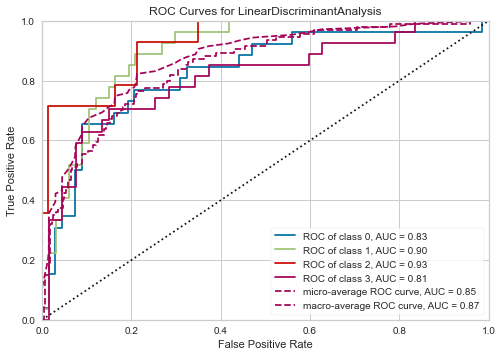

In [15]:
plot_model(best_model, plot = 'auc')